# Importing the Libraries and the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(plt.style.available)
plt.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
raw_df = pd.read_csv('Titanic-Dataset.csv')
raw_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [4]:
raw_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
raw_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Data Cleaning

In [7]:
# Checking for any Duplicated values.
raw_df.duplicated().sum()

0

### Missing Values

In [8]:
raw_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# The Age attribute needs to be imputed with mean ages.
# Cabin is not an important attribute to study, so its wont be dealt with.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
raw_df[['Age']] = imputer.fit_transform(raw_df[['Age']])

raw_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The missing values in 'Age' has been filled with the mean age.

### Outliers

In [11]:
raw_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to the descriptive statistics, Age and fare can contain outliers.

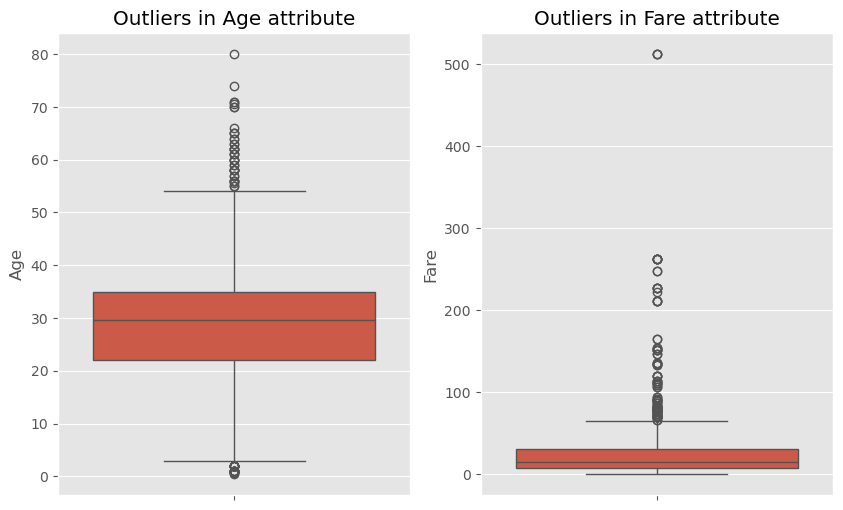

In [12]:
# Visualizing the Outliers using the Boxplot method from seaborn before dealing with outliers.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=raw_df)
plt.title("Outliers in Age attribute")

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=raw_df)
plt.title("Outliers in Fare attribute")

plt.show()

In [13]:
# a function that cleans the Outliers.
def outliers(array):
    '''This method calculates the upper and lower limits and finds outliers in an attribute
    of the dataset passed as an array.
    It further trims/caps the outliers to their respective lower or upper limits.'''

    '''Calculating the upper and the lower limit of the attribute.'''
    iqr = array.quantile(0.75) - array.quantile(0.25)
    lower_limit = array.quantile(0.25) - (1.5 * iqr)
    upper_limit = array.quantile(0.75) + (1.5 * iqr)
    
    '''Trimming the outlier.'''
    '''Creating a new_array with trimmed outliers.'''
    new_array = []
    for i in array:
        if i < lower_limit:
            i = lower_limit
        elif i > upper_limit:
            i = upper_limit
        new_array.append(i)
    '''returning an array with trimmed outliers'''
    return np.array(new_array)

In [14]:
df = raw_df.copy()

In [15]:
df['Age'] = outliers(raw_df['Age'])
df['Fare'] = outliers(raw_df['Fare'])

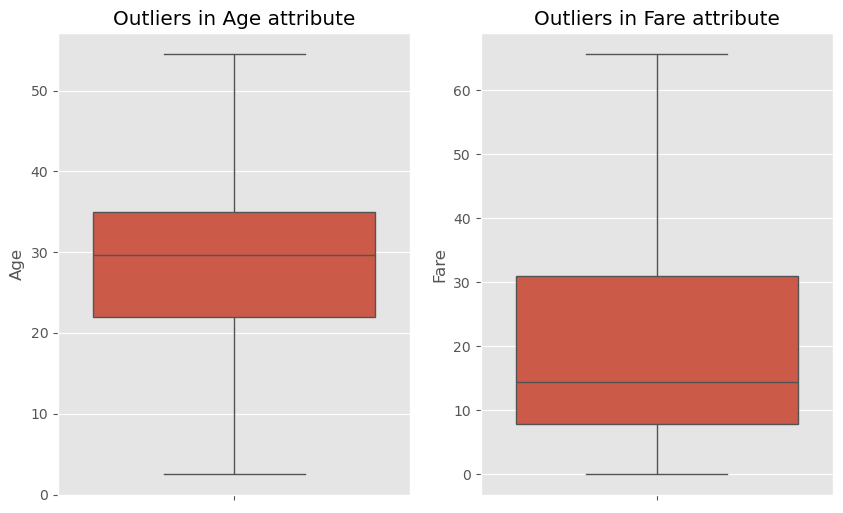

In [16]:
# Visualizing the Outliers using the Boxplot method from seaborn after dealing with outliers.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=df)
plt.title("Outliers in Age attribute")

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=df)
plt.title("Outliers in Fare attribute")

plt.show()

### Label Encoding

In [17]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
# using label encoder to encode the 'Sex' attribute. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,65.6344,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2


The 'Sex' attribute has been encoded with 1(male) and 0(female).

## Data Visualization

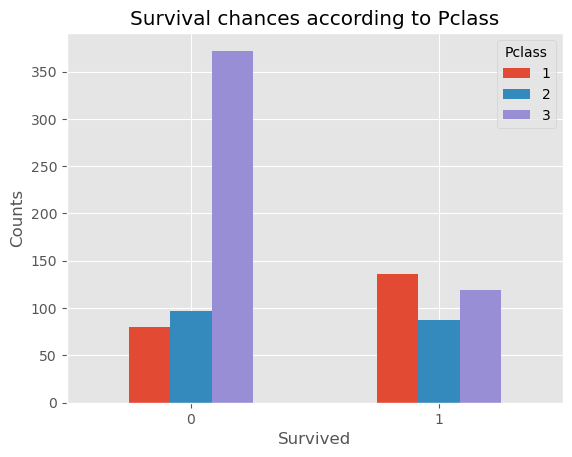

In [19]:
df_survived_pclass = raw_df[['Survived', 'Pclass']].groupby(by=['Survived']).value_counts().unstack()

df_survived_pclass.plot(kind='bar')
plt.xlabel("Survived")
plt.ylabel("Counts")
plt.title("Survival chances according to Pclass")
plt.xticks(rotation=0)
plt.show()

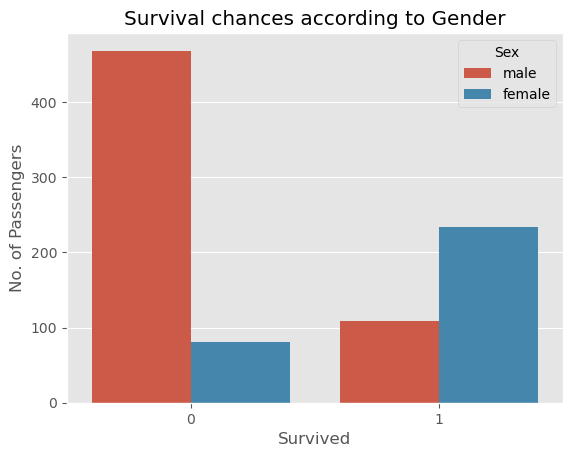

In [20]:
sns.countplot(x='Survived', hue='Sex', data=raw_df)
plt.title("Survival chances according to Gender")
plt.xlabel("Survived")
plt.ylabel("No. of Passengers")
plt.show()

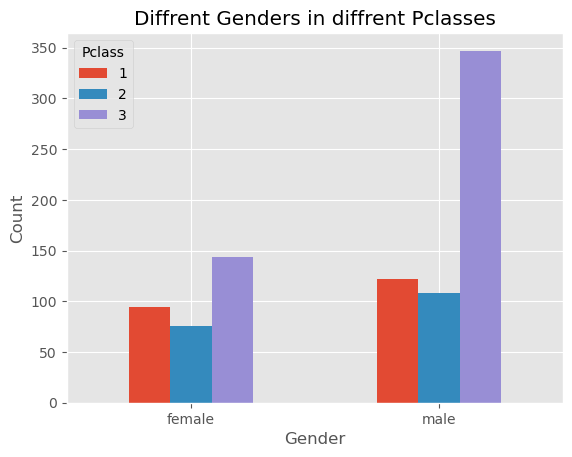

In [21]:
df_pclass_sex = raw_df[['Pclass', 'Sex']].groupby(by=['Sex']).value_counts().unstack()

df_pclass_sex.plot(kind='bar')
plt.title("Diffrent Genders in diffrent Pclasses")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

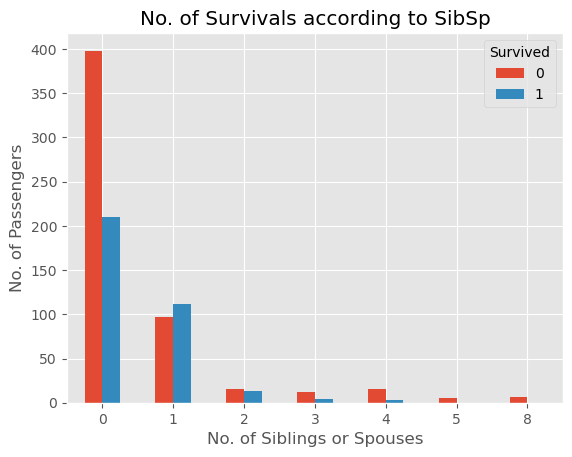

In [22]:
df_survived_SibSp = raw_df[['Survived', 'SibSp']].groupby(by=['SibSp']).value_counts().unstack()

df_survived_SibSp.plot(kind='bar')
plt.xlabel("No. of Siblings or Spouses")
plt.ylabel("No. of Passengers")
plt.title("No. of Survivals according to SibSp")
plt.xticks(rotation=0)
plt.show()

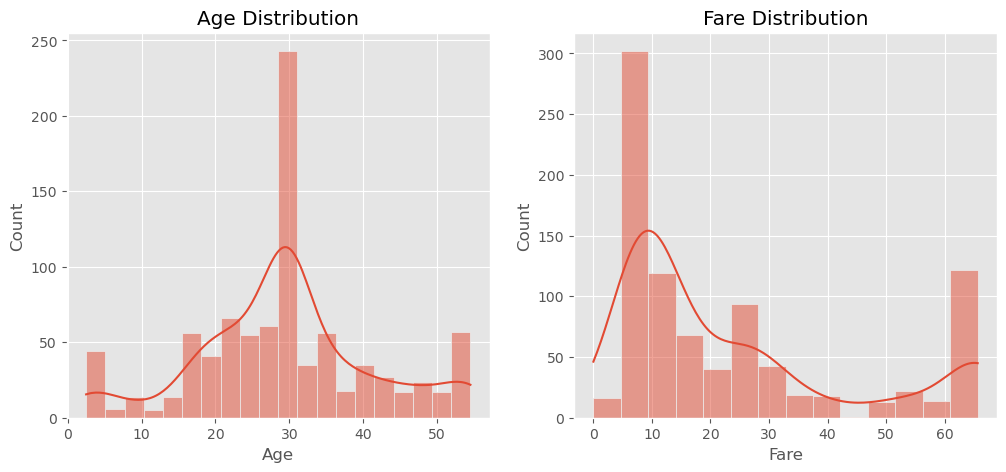

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=True)
plt.title("Fare Distribution")

plt.show()

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,65.6344,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


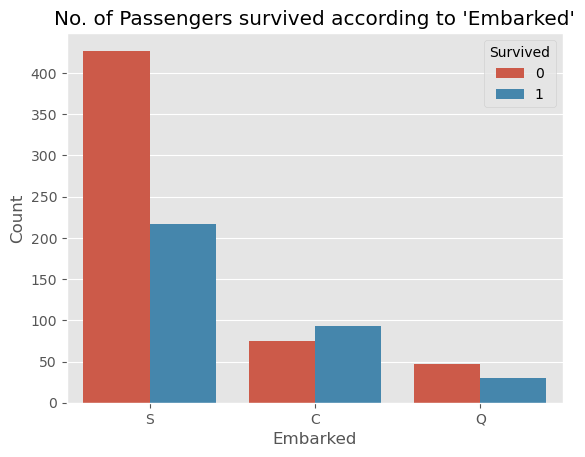

In [25]:
sns.countplot(x='Embarked', hue='Survived', data=raw_df)
plt.title("No. of Passengers survived according to 'Embarked'")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

In [26]:
df_pclass_age = df[['Pclass', 'Age']].groupby(by=['Pclass']).mean().reset_index()

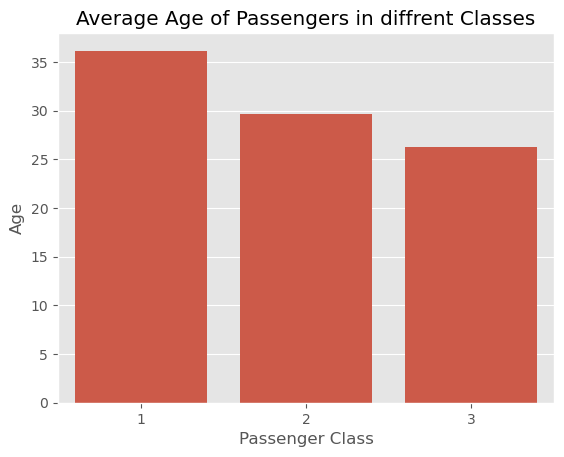

In [27]:
sns.barplot(x='Pclass', y='Age', data=df_pclass_age)
plt.title("Average Age of Passengers in diffrent Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

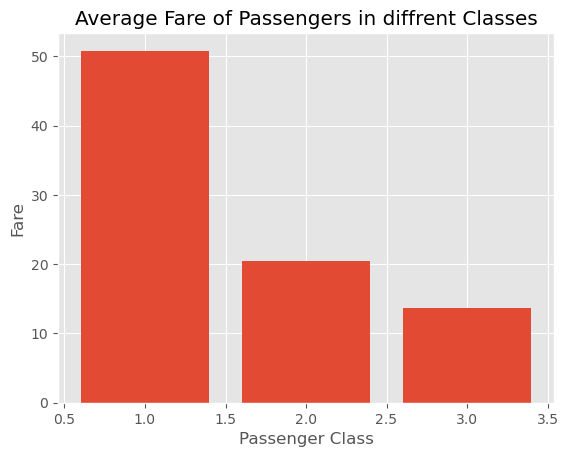

In [28]:
df_pclass_fare = df[['Pclass', 'Fare']].groupby(by=['Pclass']).mean().reset_index()

plt.bar(df_pclass_fare['Pclass'], df_pclass_fare['Fare'])
plt.title("Average Fare of Passengers in diffrent Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


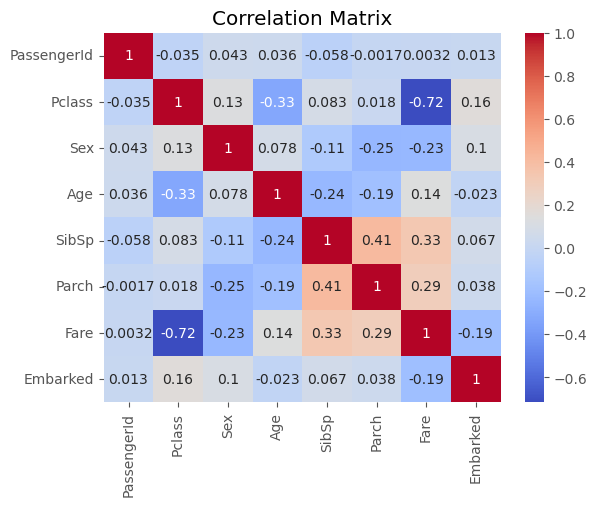

In [30]:
# finding the correlations between diffrent attributes.
numeric_df = df.select_dtypes(['int32', 'int64', 'float64']).drop(['Survived'], axis=1)
corr = numeric_df.corr()

sns.heatmap(data=corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,65.6344,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


## Inputs and Target

In [32]:
# defining the inputs and the target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2


## Train Test split

In [33]:
# splitting the inputs and the target into training and testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

## Feature Scaling

In [34]:
# Standardizing the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Model Training and Testing

In [35]:
# Accuracy Method.
from sklearn.metrics import accuracy_score, confusion_matrix
def accuracy(X, y, model):
    '''This Method calculates accuracy score and Confusion matrix based on 
    given inputs and target.'''
    y_pred = model.predict(X)
    print(confusion_matrix(y_pred, y))
    print(accuracy_score(y_pred, y))

In [36]:
# K-Fold Cross Validation.
from sklearn.model_selection import cross_val_score
def k_fold_cross_val(model, X, y):
    '''This Method is used to calculate the mean accuracy and the std.dev. using 
    k Fold cross validation.'''
    accuracies = cross_val_score(estimator=model, X=X, y=y, cv=10)
    print("Mean Accuracy: ", (accuracies.mean()*100).round(2), "%")
    print("Standard Deviation: ", (accuracies.std()*100).round(2), "%")

## Logistic Regression

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Accuracy on the Trainig set.
accuracy(X_train, y_train, lr)

[[369  79]
 [ 68 196]]
0.7935393258426966


In [39]:
# Accuracy on the Test Set.
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, lr)

[[95 18]
 [17 49]]
0.8044692737430168


In [40]:
k_fold_cross_val(lr, X_train, y_train)

Mean Accuracy:  79.35 %
Standard Deviation:  2.18 %


## K-nearest Neighbours

In [41]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# Training accuracy.
accuracy(X_train, y_train, knn)

[[399  70]
 [ 38 205]]
0.848314606741573


In [43]:
# Test accuracy
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, knn)

[[99 23]
 [13 44]]
0.7988826815642458


In [44]:
k_fold_cross_val(knn, X_train, y_train)

Mean Accuracy:  81.6 %
Standard Deviation:  3.28 %


## Support Vector Machine

In [45]:
# Support vector classifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [46]:
accuracy(X_train, y_train, svc)

[[414  89]
 [ 23 186]]
0.8426966292134831


In [47]:
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, svc)

[[104  24]
 [  8  43]]
0.8212290502793296


In [48]:
k_fold_cross_val(svc, X_train, y_train)

Mean Accuracy:  82.3 %
Standard Deviation:  3.68 %


## Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [50]:
accuracy(X_train, y_train, nb)

[[367  79]
 [ 70 196]]
0.7907303370786517


In [51]:
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, nb)

[[94 15]
 [18 52]]
0.8156424581005587


In [52]:
k_fold_cross_val(nb, X_train, y_train)

Mean Accuracy:  76.96 %
Standard Deviation:  3.14 %


## Random Forest Classification

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [54]:
accuracy(X_train, y_train, rfc)

[[425  41]
 [ 12 234]]
0.925561797752809


In [55]:
X_test = scaler.fit_transform(X_test)
accuracy(X_test, y_test, rfc)

[[91 19]
 [21 48]]
0.776536312849162


In [56]:
k_fold_cross_val(rfc, X_train, y_train)

Mean Accuracy:  81.17 %
Standard Deviation:  5.09 %


# Conclusions
#### Logistic Regression
- Training Accuracy: 79.3% <br>
- Test Accuracy: 80.44%
#### KNN
- Training Accuracy: 84.83% <br>
- Test Accuracy: 79.88%
#### Support Vector Classifier
- Training Accuracy: 84.26% <br> 
- Test Accuracy: 82.21%
#### Naive Bayes
- Training Accuracy: 79.07% <br>
- Test Accuracy: 81.56%
#### Random Forest Classifier
- Training Accuracy: 92.55% <br>
- Test Accuracy: 77.65%

`Support Vector Classifier has the best performance`

## <h1 align='center'>Thank You!</h1>